### Часть 1. Изучение исходных данных.

In [2]:
import pandas as pd
data = pd.read_csv('games.csv')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
from IPython.display import display
import numpy as np
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для исследования и анализа нам понадобится excel-файл содержащий те же данные и в таком же виде, как и в датафрейме. Извлечем его.

In [3]:
#Проверяем наличие необходимых библиотек
#!pip install openpyxl
#!pip install xlrd

#Defaulting to user installation because normal site-packages is not writeable
#Requirement already satisfied: openpyxl in /home/jovyan/.local/lib/python3.7/site-packages (3.0.4)
#Requirement already satisfied: jdcal in /home/jovyan/.local/lib/python3.7/site-packages (from openpyxl) (1.4.1)
#Requirement already satisfied: et-xmlfile in /home/jovyan/.local/lib/python3.7/site-packages (from openpyxl) (1.0.1)
#Defaulting to user installation because normal site-packages is not writeable
#Requirement already satisfied: xlrd in /opt/conda/lib/python3.7/site-packages (1.2.0)

In [4]:
#!pip install XlsxWriter
#excel_file = pd.ExcelWriter('games.xlsx', engine='xlsxwriter')
# Записываем датафрейм в файл     
#data.to_excel(excel_file, sheet_name='games', encoding='utf-8')
# Сохраняем результат 
#excel_file.save()

Смотрим и изучаем общую информацию о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходные данные в таблице представлены следующими столбцами:

- Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы долларов)
-	EU_sales — продажи в Европе (миллионы долларов)
-	JP_sales — продажи в Японии (миллионы долларов)
-	Other_sales — продажи в других странах (миллионы долларов)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### <font color='purple'> 1-ый промежуточный вывод.</font>
Качество предоставленных данных оставляет желать лучшего. В столбцах: оценка критиков - *Critic_Score* и оценка пользователей - *User_Score*, а также рейтинг от организации *ESRB* - *Rating*, пропущена почти половина данных. В записях об играх за 1995 год эти данные вообще не представлены. 

Непонятно присхождение рейтингов *ESRB* в записях ранее 1994 года, поскольку именно в этому году *ESRB* была образована американской ассоциацией производителей компьютерных игр и ПО. Историческая справка: "*The Entertainment Software Rating Board (ESRB) was founded and started rating games in the year 1994. It is a self-regulatory organization that assigns age and content ratings and enforces industry-adopted advertising guidelines for computer and video games in the United States and Canada*."

В столбце *Year_of_Release* пропущено около двух процентов записей, в столбце *Name* отсутствуют названия двух игр и соответствующие им жанры в столбце *Genre*.

### Часть 2. Подготовка данных.

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приводим названия столбцов к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим сколько пропущено записей в столбце *year_of_release*. 

In [9]:
data['year_of_release'].isna().sum()

269

В колонке *year_of_release* пропущены 269 записей. Не так уж и много, около 1.5% от общего количества записей. Тем не менее, попробуем восстановить пропущенные годы в тех случаях, когда имеются данные о времени выпуска одной и той же игры на разных платформах. Как правило производители выпускают в продажу игру одновременно на всех профильных для них платформах.

In [10]:
for name in data['name'].unique():
    median = data.loc[data['name'] == name, 'year_of_release'].median()
    data.loc[(data['year_of_release'].isna()) & (data['name'] == name), 'year_of_release'] = median
data['year_of_release'].isna().sum()

146

Неплохо, мы восстановили почти половину пропущенных значений в стобце *year_of_release*.

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Было бы еще неплохо заменить все пропущеные значения *NaN* в столбце *year_of_release* на 0, а значения типа *float* для красоты изменить на тип *int*. Но при дальнейших манипуляциях с датафреймом придется указывать диапазоны при построении графиков. Поэтому оставим пока все как есть.

Проверим на всякий случай, как прошли замены. 

In [12]:
data['year_of_release'].unique()

array([2006. , 1985. , 2008. , 2009. , 1996. , 1989. , 1984. , 2005. ,
       1999. , 2007. , 2010. , 2013. , 2004. , 1990. , 1988. , 2002. ,
       2001. , 2011. , 1998. , 2015. , 2012. , 2014. , 1992. , 1997. ,
       1993. , 1994. , 1982. , 2016. , 2003. , 1986. , 2000. , 1995. ,
       1991. , 1981. , 1987. , 1980. , 1983. ,    nan, 2002.5, 2013.5,
       2005.5, 2001.5])

Появились дробные значения в столбце *year_of_release*. Благо их оказалось немного, исправляем.

In [13]:
data['year_of_release'] = data['year_of_release'].replace(2002.5, )
data['year_of_release'] = data['year_of_release'].replace(2013.5, )
data['year_of_release'] = data['year_of_release'].replace(2005.5, )
data['year_of_release'] = data['year_of_release'].replace(2001.5, )
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

Теперь разберемся с записями 'tbd' в столбце *user_score*.

In [14]:
data[data['user_score'] == 'tbd']['user_score'].count()

2424

В столбце *user_score* 2424 раза встречается запись *tbd*, которая скорее всего означает, что на момент создания записи рейтинг данной игры был в процессе рассмотрения. Но то ли это были всего лишь нереализованные планы, то ли не хатило кворума голосов, то ли оценку сделали, но ее забыли внести и т.д. Причин может быть несколько, восстановить реальную картину практически не возможно.

Кроме того, а нашем случае запись *tbd* никакой полезной для нас информации не содержит. Корректно заменить ее на какое-то значение не получится, поскольку рейтинги одной и той же игры на разных платформах могут отличаться и они в общем случае отличаются. Поэтому в рамках данного исследования мы этот факт просто игнорируем.

На всякий случай сохраним столбец *user_score*, чтобы можно было использовать эти данные при необходимости. Создаем новый столбец *user_score_1*, в котором переводим значения исходного столбца из строкового типа *str* в вещественный тип *float*, при этом записи *tbd* будут заменены на *NaN*.

In [15]:
data['user_score_1'] = pd.to_numeric(data['user_score'], errors='coerce')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  user_score_1     7590 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


Посмотрим теперь на строки с пропущенными названиями игр и жанрами. 

In [17]:
data_nan = data.sort_values(by ='name', na_position ='first' ) 
data_nan.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN


По большому счету, особой информативностью эти строки не обладают, да и относятся к прошлому веку. Но с другой стороны, они ничем не мешают. Оставим их все-таки для полноты картины и статистики продаж по годам и платформам.

Подсчитаем суммарные продажи игр по регионам и сохраним их в новом столбце *total_sales*.

In [18]:
list = ['na_sales', 'jp_sales','eu_sales', 'other_sales']
data['total_sales'] = data[list].sum(axis=1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38


Заодно посмотрим, как отличаются регионы друг от друга по объемам продаж.

In [19]:
print('Продажи игр в Северной Америке:', data['na_sales'].sum())
print('Продажи игр в Европе:', data['eu_sales'].sum())
print('Продажи игр в Японии:',data['jp_sales'].sum())
print('Продажи игр в других странах:', data['other_sales'].sum())

Продажи игр в Северной Америке: 4402.35
Продажи игр в Европе: 2424.67
Продажи игр в Японии: 1297.37
Продажи игр в других странах: 791.32


Просуммируем продажи игр по всему миру.

In [20]:
data['total_sales'].sum()

8915.71

#### <font color='purple'>2-ой промежуточный вывод.</font>

Справедливости ради, стоит отметить, что, полученная выше сумма продаж игр по всему миру, на порядок отличается от реальных цифр. Как следует из авторитетного источника "Всемирная история игровой индустрии" (https://stopgame.ru/blogs/topic/89367):

"В 2016-ом году мировая прибыль (доход, прим. автора исследования) от видеоигр достигла 100 млрд. долларов, что на 8.5 процентов больше, чем в 2015-ом. Доля ПК в ней занимает 36.9 млрд. долларов. Правда, это цифра включает в себя насквозь ПК-шный Китай, за которым 25 процентов всей индустрии, как и за США. Ещё 37 млрд. долларов удерживают мобильные игры." 

В публикации "Объемы игровой индустрии": https://gamesisart.ru/istoriya_komputernyh_igr_2.html эта цифра уточняется - 84,406 млрд. долларов. 

Если принять к сведению объем продаж в 2016 году, а  также реальное распределение игровых платформ (плюс PC и Nintendo), то можно считать, что рассматриваемый датасет является случайной выборкой из действительной (генеральной) совокупности даных. Очевидно, что полученные в дальнейшем результаты будут весьма приблизительно отражать реальное положение дел. 

### Часть 3. Исследовательский анализ данных.

#### 1. Для начала посмотрим, как новые игры распределялись по годам выпуска.

Text(0.5, 1.0, 'Выпуск новых игр по годам')

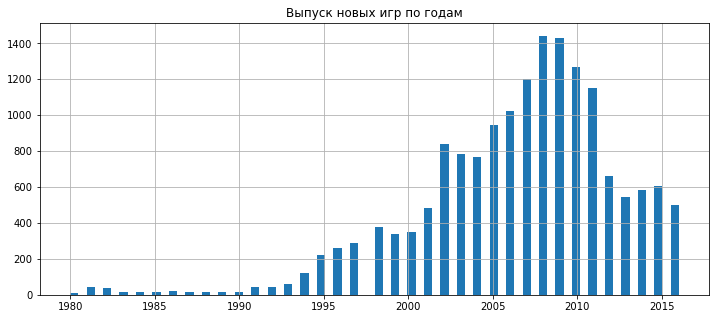

In [21]:
import matplotlib.pyplot as plt
data['year_of_release'].hist(bins=74, range=(1980, 2016), figsize=(12, 5))
plt.title('Выпуск новых игр по годам')

#### <font color='purple'>3-ий промежуточный вывод.</font> 

На гистограмме наблюдается пик выпуска новых игр в 2007 - 2011 годах. Этому явлению соответствуют несколько событий.  Одним из главных событий, кардинально изменившим состояние дел на мировом рынке мобильных игровых приложений, стал запуск компанией Apple виртуального магазина App Store в июле 2008. В том же году появился Google Play. История социальных игр как серьезных проектов, приносящих весомый доход, начинается с 2007 года, когда были основаны компании Playfish (Великобритания) и Zynga (США).

В борьбе за потребителя с 2005 по 2007 годы основные участники рынка консолей выпустили новые поколения своих устройств. Например, в седьмом поколении компания Nintendo представила свое необычное решение Wii и состоялся запуск Sony PlayStation 3. 

Начиная примерно с 2006 — 2007 в Китае открывается более 100 аутсорсинговых компаний, занимающихся разработкой графики и других компонентов игрового ПО. К 2006 году китайские производители заняли 64.8% рынка и запустили 218 игр, что на 26 игр больше чем в 2005.

В 2009-ом году повился Kickstarter — сайт для привлечения денежных средств на реализацию творческих, научных и производственных проектов по схеме краудфандинга. С ростом цифровой дистрибуции и платформ типа Steam, gog.com и Humble Store появилась возможность распространять игры гораздо свободнее, не связывая себя рамками контрактов с Microsoft и XBLA, Sony и PlayStation Network. А в последнее время некоторые компании осваивают систему подписки, по аналогии с Netflix. 

И это все несмотря на глобальный экономический кризис, бушевавший в те годы. Во "Всемирной история игровой индустрии" так описывается то время: "В итоге кризис порешил большинство студий средней руки не только в США, но и во всём мире. Вообще игровая индустрия пострадала гораздо меньше других, ведь в сложившееся экономическом положении игры оставались самым доступным видом развлечения. В 2008 году National Research Center провёл исследование и выяснилось, что 46% респондентов собираются в «Чёрную пятницу» потратить деньги на игры. Именно на период кризиса пришёлся резкий рост продаж домашних консолей и, сооветственно, выпуск и продажи новых игр.

#### 2. Найдем лидеров продаж игр по платформам.

In [22]:
data_platform_sale = data.groupby(
    'platform')['total_sales'].sum().sort_values(ascending = False)

data_platform_sale = data_platform_sale.reset_index()# <добавляем индексы к таблице>
data_platform_sale.head(12) 

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Построим графики, отражающие по годам количество выпущенных игр для первой шестерки платофрм.

'PS2'

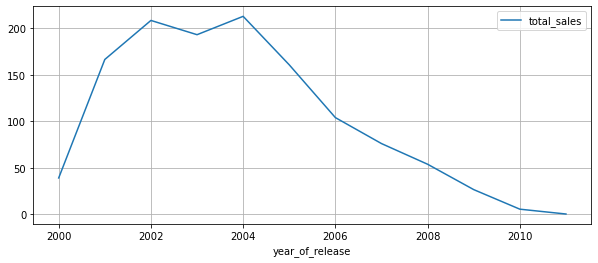

'X360'

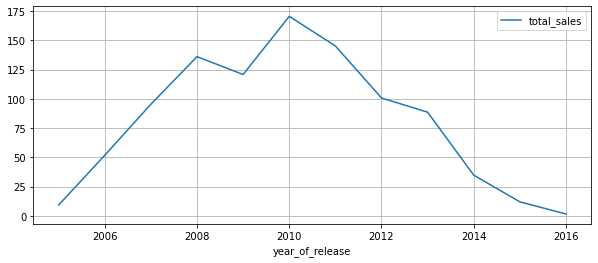

'PS3'

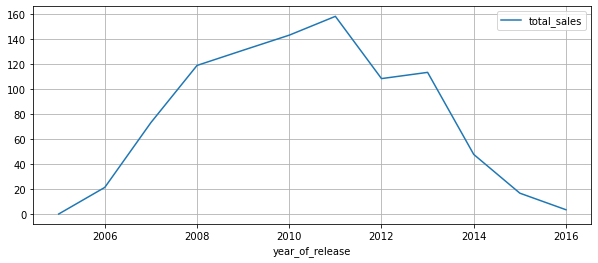

'Wii'

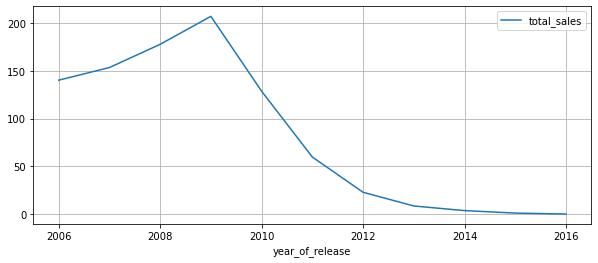

'DS'

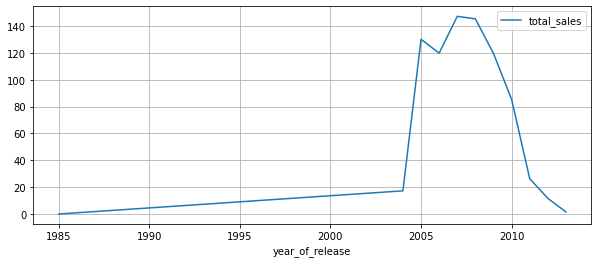

'PS'

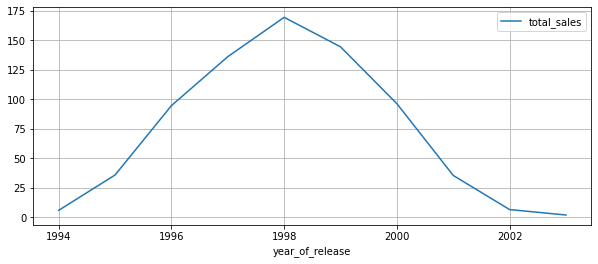

In [23]:
platform_list = data_platform_sale.loc[0:5, 'platform']#['PS2', 'X360', 'PS3'] 
for element in platform_list:
    display(element)
    data.query('platform == @element').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        grid=True, figsize=(10, 4))
    plt.show()   

Проделаем то же самое для второй шестерки платформ.

'GBA'

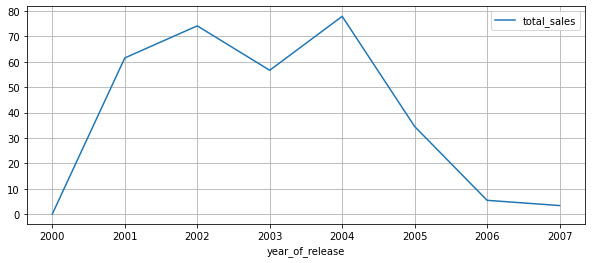

'PS4'

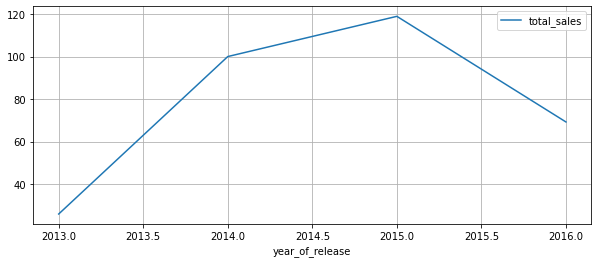

'PSP'

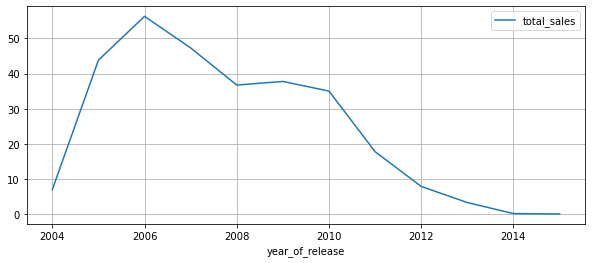

'PC'

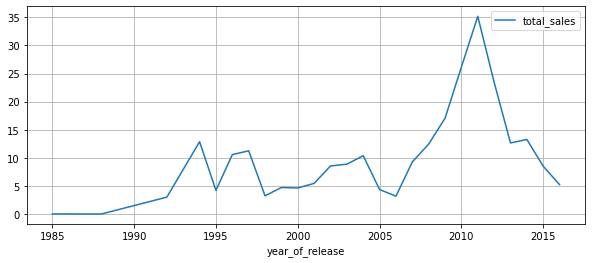

'3DS'

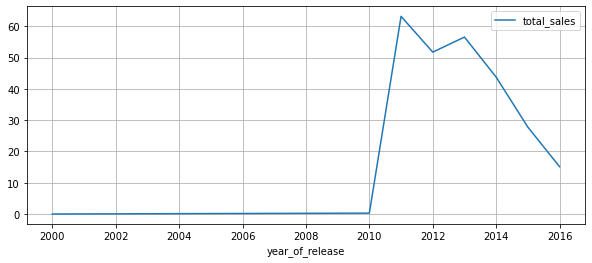

'XB'

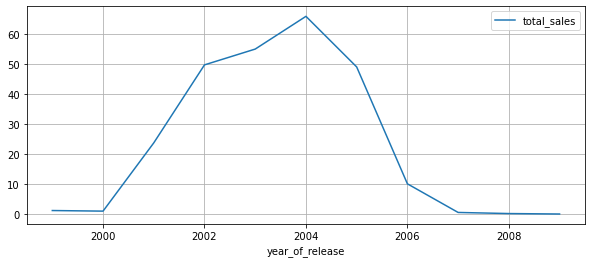

In [24]:
platform_list_2 = data_platform_sale.loc[6:11, 'platform'] 
for element_2 in platform_list_2:
    display(element_2)
    data.query('platform == @element_2').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        grid=True, figsize=(10, 4), label=('platform == @element_2'))
    plt.show()   

#### 3. Исследуемый актуальный период.
Жизненный цикл ведущих игровых платформ составляет от 6-ти до 10-ти лет. Соответственно рост продаж продолжается от 3-х до 5-ти лет, а затем неизбежно следует спад. 

Исходя из этих цифр, можно было бы считать актуальным периодом 2012-2016 годы, но для декабря 2016 года нет данных, а  ведь впереди рождественские каникулы и новогодние праздники, на которые приходится традиционный всплеск продаж. Поэтому в рамках текущего исследования придется ограничить актуальный период 2015 годом. 

In [25]:
data_actual = data.query('2012 <= year_of_release < 2016')
data_actual = data_actual.reset_index(drop=True)

Посмотрим как распределились платформы по суммарным продажам игр в актуальный период.

In [26]:
data_actual_platform_sale = data_actual.groupby(
    'platform')['total_sales'].sum().sort_values(ascending = False)#.sort_values(ascending = False) удолить лишнюю команду

data_actual_platform_sale = data_actual_platform_sale.reset_index()# <добавляем индексы к таблице>
data_actual_platform_sale

,platform,total_sales
0,PS3,286.11
1,PS4,244.89
2,X360,236.00
3,3DS,179.87
4,XOne,133.17
5,WiiU,77.59
6,PC,57.91
7,PSV,44.93
8,Wii,36.42
9,DS,13.21


Теперь изучим динамику продаж игр по платформам.

'PS3'

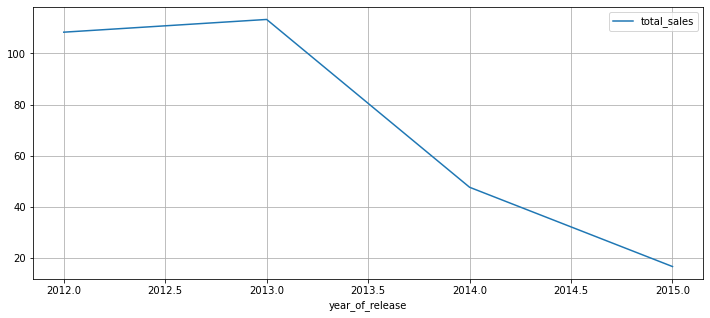

'PS4'

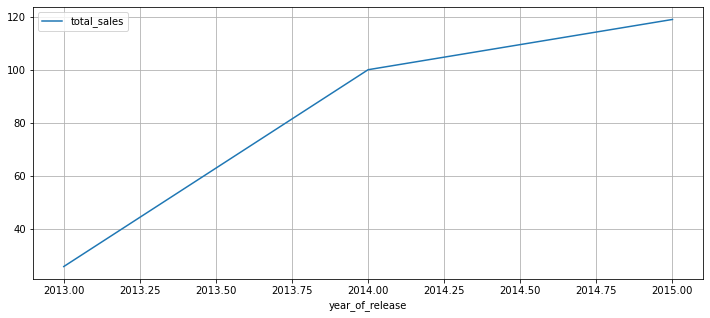

'X360'

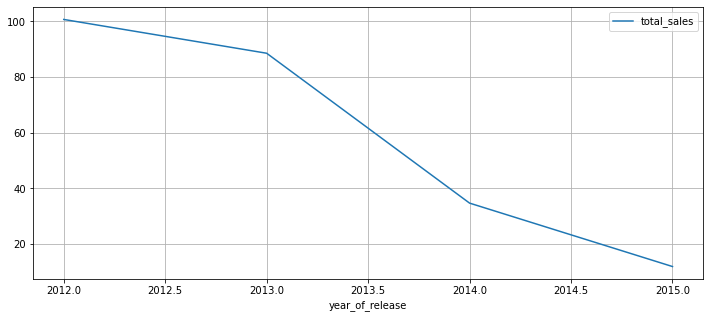

'3DS'

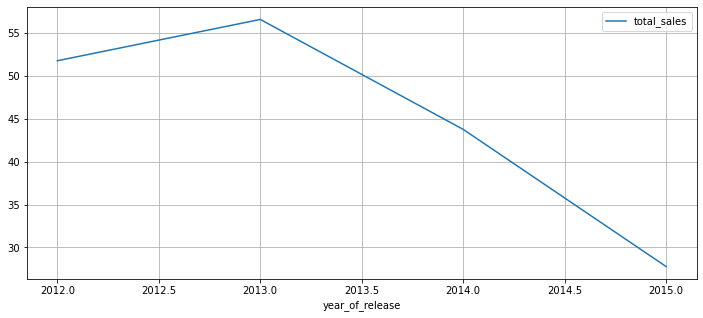

'XOne'

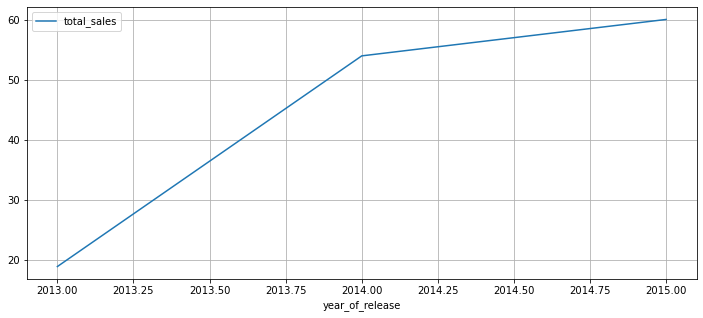

'WiiU'

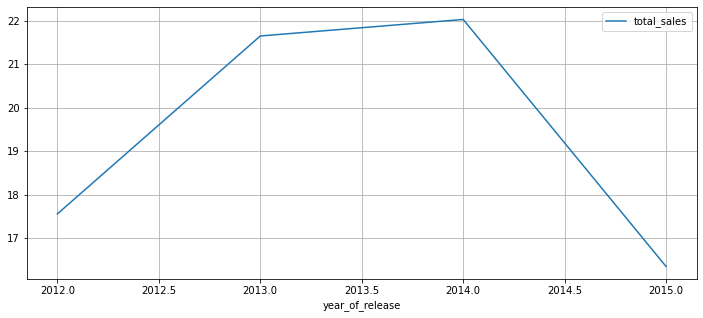

'PC'

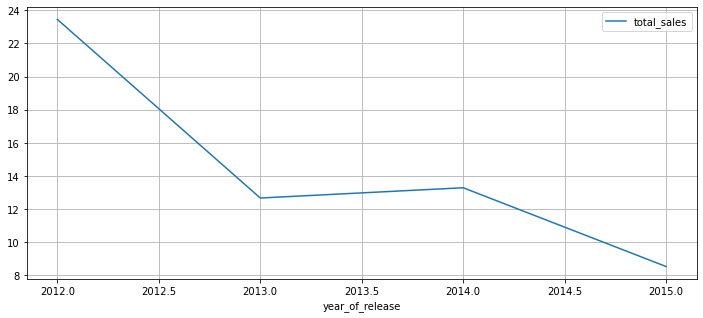

'PSV'

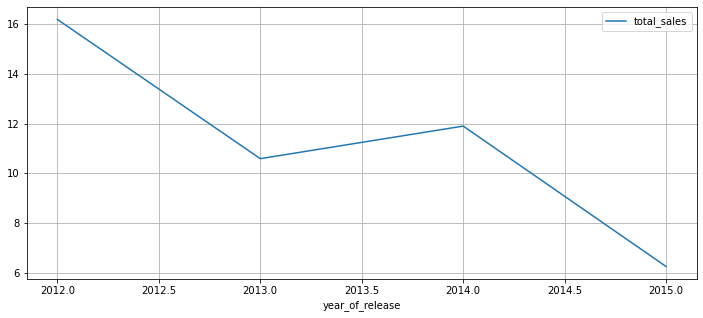

'Wii'

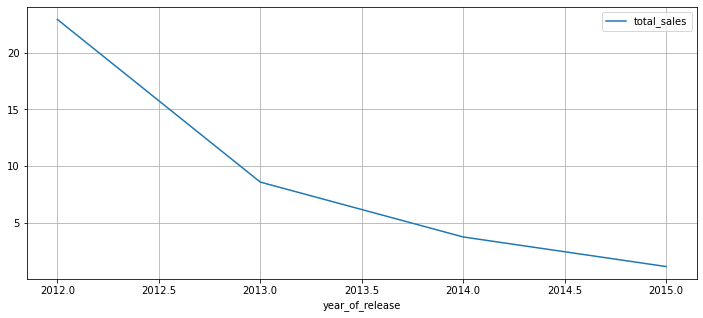

'DS'

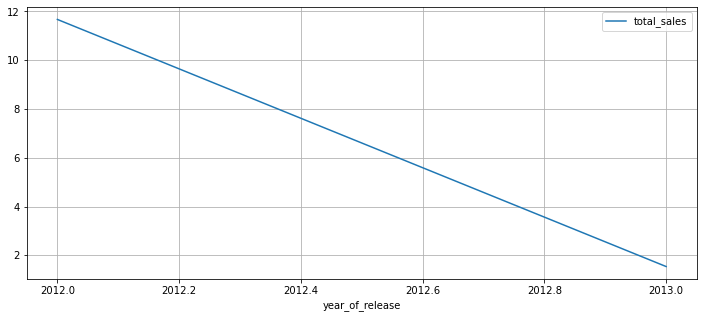

'PSP'

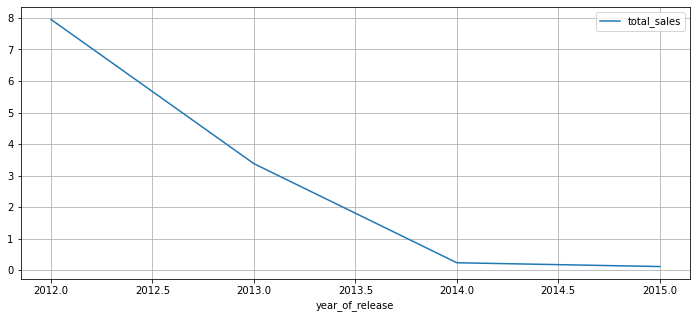

In [27]:
platform_list_3 = data_actual_platform_sale.loc[0:10, 'platform'] 
for element_3 in platform_list_3:
    display(element_3)
    data_actual.query('platform == @element_3').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        grid=True, figsize=(12, 5))
    plt.show() 

#### 4. Лидирующие платформы.
Как видно из графиков , только две платформы демонстрируют рост на протяжении двух последних лет лет из актуального периода: PS4 и XOne. Займемся ими и изучим распределение продаж игр для каждой платформы с помощью "ящика с усами". 

<font color='crimson'>Но вот вопрос: а как же консоли Nintendo? И где же китайская армия игроков, поголовно сидящих на PC? Почему-то авторы датасета оставили эти платформы без должного внимания и они оказались за бортом исследуемых данных.</font>

Начнем исследование с PS4. Построим "ящик с усами" и гистограмму продаж.

In [28]:
data_actual_ps4 = data_actual.query('platform == "PS4"').sort_values(by='total_sales', ascending=False)
display(data_actual_ps4['total_sales'].describe())
data_actual_ps4.head()

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1,total_sales
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
6,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,8.3,12.62
14,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,8.58
17,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,7.98
18,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,5.7,7.66


(0.0, 14.7)

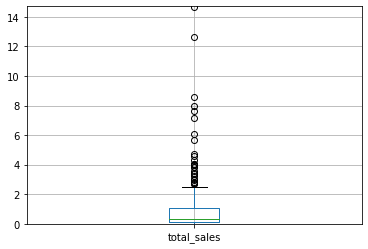

In [29]:
data_actual_ps4.boxplot('total_sales')
plt.ylim(0, 14.7)

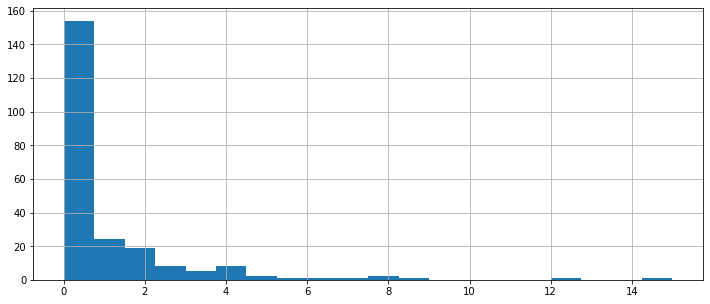

In [30]:
data_actual_ps4['total_sales'].hist(bins=20, range=(0, 15), figsize=(12, 5))

"Ящик с усами" и гистограмма указывают на длинный хвост в области больших значений. 

Перейдем к платформе XOne.

In [33]:
data_actual_xone = data_actual.query('platform == "XOne"')
data_actual_xone['total_sales'].describe()

count    160.000000
mean       0.832312
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: total_sales, dtype: float64

(0.0, 7.4)

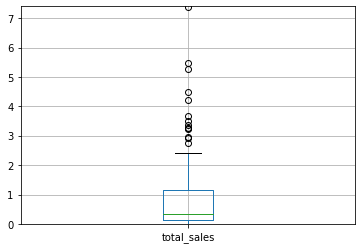

In [34]:
data_actual_xone.boxplot('total_sales')
plt.ylim(0, 7.4)

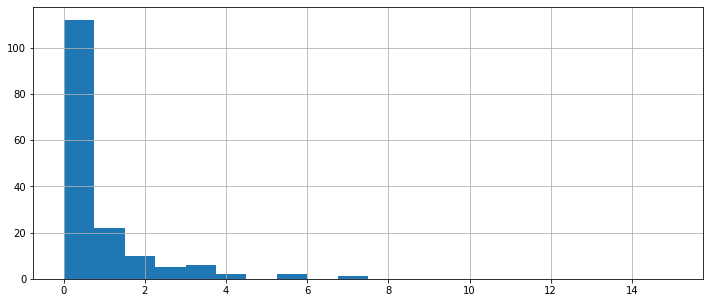

In [35]:
data_actual_xone['total_sales'].hist(bins=20, range=(0, 15), figsize=(12, 5))

Мы получили очень похожие картины. Стоит обратить внимание на то, что для обеих платформ среднее значение в 2.5-3 раза больше медианы. Это говорит о том, что в распределении длинный хвост больших значений или несколько очень больших значений. Другими словами есть совсем немного игр, приносящих значительный доход. Это своего рода блокбастеры игровой индустрии, а основная  масса игр приносит не слишком большой доход. Зато таких игр много и каждый год появляется еще больше и любой геймер может выбрать новую игру по своему вкусу. 

#### 5. Продажи и рейтинги. 
Поcмотрим есть ли какая-то зависимость между продажами и рейтингами пользователей и критиков. Для этого построим диаграммы рассеяния.

Построим диаграмму рассеяния для рейтингов пользователей платформы PS4.

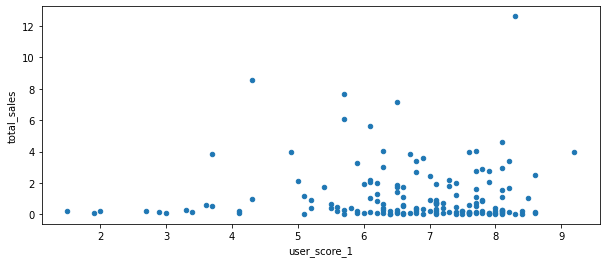

In [36]:
data_actual_ps4.plot(x='user_score_1', y='total_sales', figsize=(10, 4), kind='scatter')

Вычмслим коэффициент корреляции Пирсона.

In [37]:
data_actual_ps4['user_score_1'].corr(data_actual_ps4['total_sales'])

0.02423083236062255

Явной зависимости не наблюдается и корреляция так себе.

*Попробуем использовать очищенные данные.*

In [38]:
data_actual_ps4['user_score_1'].describe()

count    156.000000
mean       6.666667
std        1.449242
min        1.500000
25%        6.100000
50%        6.950000
75%        7.700000
max        9.200000
Name: user_score_1, dtype: float64

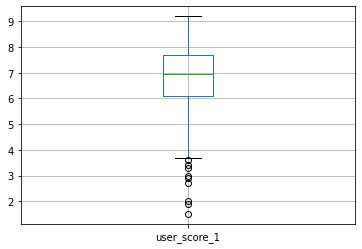

In [39]:
data_actual_ps4.boxplot('user_score_1')

In [40]:
data_actual_ps4_sales_cl = data_actual_ps4.query('total_sales <= 5')
data_actual_ps4_sales_cl
data_actual_ps4_sales_cl = data_actual_ps4.query('4 < user_score_1')

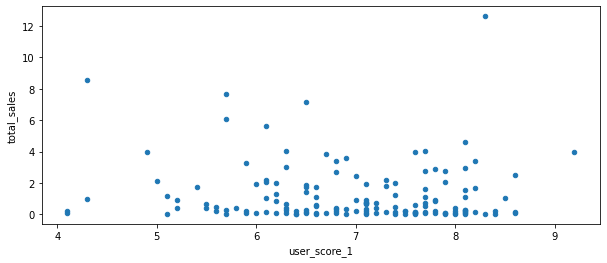

In [41]:
data_actual_ps4_sales_cl.plot(x='user_score_1', y='total_sales', figsize=(10, 4), kind='scatter')

In [42]:
data_actual_ps4_sales_cl['user_score_1'].corr(data_actual_ps4_sales_cl['total_sales'])#=-0.0797359770172089

-0.0797359770172089

*Фокус не удался :(, хотя корреляция и выросла в три раза, но не на порядок.* 

Попробуем тогда восстановить рейтинг пользователей.

228

0.02715755973483791

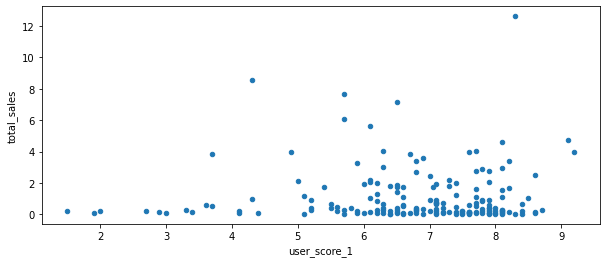

In [43]:
data_actual['user_score_1'].isna().sum()# =1119

display(len(data_actual_ps4['user_score_1']))# = 228
data_actual_ps4['user_score_1'].isna().sum()# = 72

#Заменим пропуски на медианы там, где есть рейтинги игр на других платформах
for name in data_actual['name'].unique():
    median = data_actual.loc[data_actual['name'] == name, 'user_score_1'].median()
    data_actual.loc[(data_actual['user_score_1'].isna()) & (data_actual['name'] == name), 'user_score_1'] = median
data_actual['user_score_1'].isna().sum()# = 980 итого получилось 140 замен, чуть больше 10%

data_actual_ps4 = data_actual.query('platform == "PS4"')# заново собираем датасет

data_actual_ps4['user_score_1'].isna().sum()# =52 здесь здесь также получилось 20 замен, те же 10%

# строим диаграмму
data_actual_ps4.plot(x='user_score_1', y='total_sales', figsize=(10, 4), kind='scatter')
#кардинально картина не изменилась

# ищем корреляцию
data_actual_ps4['user_score_1'].corr(data_actual_ps4['total_sales'])# = 0.027157559734837917 

*Кардинально картина не изменилась, корреляция выросла всего лишь в третьем знаке. Все-таки, похоже, что рейтинг пользователей не особо влияет на продажи.*

А как обстоит дело с рейтингом критиков?

0.43184820499820054

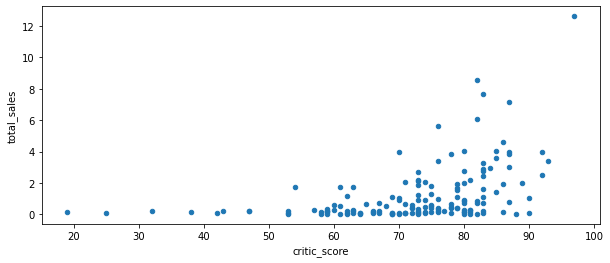

In [44]:
data_actual_ps4.plot(x='critic_score', y='total_sales', figsize=(10, 4), kind='scatter')
data_actual_ps4['critic_score'].corr(data_actual_ps4['total_sales'])

Очевидно, что пользователи больше доверяют рейтингу критиков и это оказывает влияние их на решение. Любопытства ради суммируем оба рейтинга и построим новую диаграмму.

In [45]:
data_actual_ps4['total_score'] = data_actual_ps4['user_score_1'] + (data_actual_ps4['critic_score'] / 10)
#data_actual_ps4.head(300)

<ipython-input-45-142d51a87a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual_ps4['total_score'] = data_actual_ps4['user_score_1'] + (data_actual_ps4['critic_score'] / 10)


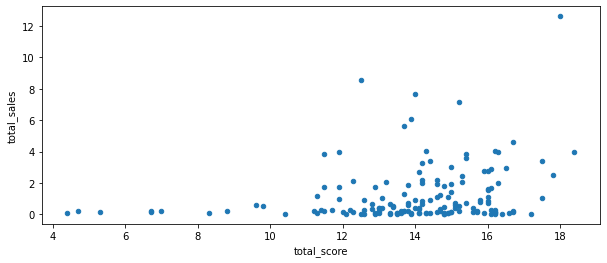

In [46]:
data_actual_ps4.plot(x='total_score', y='total_sales', figsize=(10, 4), kind='scatter')

Нельзя сказать, что диаграмма рассеяния, построенная для суммы рейтингов, значительно отличается от двух предыдущих.

#### 6. Продажи и рейтинги (продолжение).
Проведем те же исследования для платформы XOne.

-0.03926828544552199

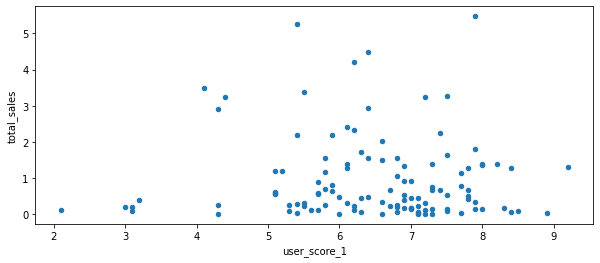

In [47]:
data_actual_xone.plot(x='user_score_1', y='total_sales', figsize=(10, 4), kind='scatter')
data_actual_xone['user_score_1'].corr(data_actual_xone['total_sales'])

0.45938456807071054

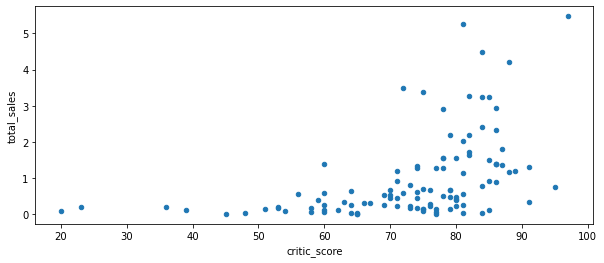

In [48]:
data_actual_xone.plot(x='critic_score', y='total_sales', figsize=(10, 4), kind='scatter')
data_actual_xone['critic_score'].corr(data_actual_xone['total_sales'])

In [49]:
data_actual_xone['total_score'] = data_actual_xone['user_score_1'] + data_actual_xone['critic_score']/10

<ipython-input-49-2f55d6aabcfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual_xone['total_score'] = data_actual_xone['user_score_1'] + data_actual_xone['critic_score']/10


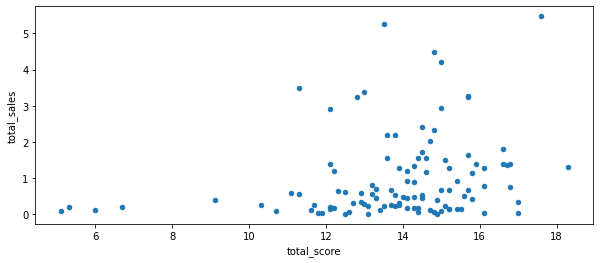

In [50]:
data_actual_xone.plot(x='total_score', y='total_sales', figsize=(10, 4), kind='scatter')

Получаем похожую картину для суммы рейтингов платформы XOne, что, в общем-то не удивительно. 

#### 7. Продажи и рейтинги (заключение).

Настало время подсчитать корреляцию продаж с рейтингами пользователей, критиков и суммой этих рейтингов.

In [51]:
#Платформа PS4.
display(data_actual_ps4['user_score_1'].corr(data_actual_ps4['total_sales']))
display(data_actual_ps4['critic_score'].corr(data_actual_ps4['total_sales']))
data_actual_ps4['total_score'].corr(data_actual_ps4['total_sales'])

0.02715755973483791

0.43184820499820054

0.23579453374514203

In [52]:
#Платфлорма XOne.
display(data_actual_xone['user_score_1'].corr(data_actual_xone['total_sales']))
display(data_actual_xone['critic_score'].corr(data_actual_xone['total_sales']))
data_actual_xone['total_score'].corr(data_actual_xone['total_sales'])

-0.03926828544552199

0.45938456807071054

0.2355976881236628

#### <font color='purple'>4-ый промежуточный вывод.</font>
Кажется, критики имеют большее влияние, чем рейтинги пользователей, хотя сильной зависимости мы все-таки не наблюдаем. С одной стороны, сколько игроков, столько и мнений. А с другой, критики - профи, ответственно относящиеся к своей работе и, значит, их мнение представляет большую ценность. Хотя, и они далеко не всегда определят выбор игроков.
А вот сумма рейтингов нам никак не помогла, к сожалению. 

#### 8. Жанры.
Пришло время разобраться с жанрами и выяснить какие из них приносят наибольший доход. Для начала оценим популярность жанров по данным всего датасета.

In [53]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Сравним этот список с лидерами актуального периода.

In [54]:
data_actual['genre'].value_counts()

Action          862
Role-Playing    316
Adventure       246
Sports          220
Shooter         190
Misc            161
Fighting         93
Racing           91
Platform         70
Simulation       62
Strategy         58
Puzzle           27
Name: genre, dtype: int64

Состав лидерующей шестерки не изменился, но в актуальном периоде только *Action* сохранил за собой первое место.

Посмотрим теперь на доходность жанров.

In [55]:
data_actual_genre_sale = data_actual.groupby(
    'genre')['total_sales'].sum().sort_values(ascending = False).sort_values(ascending = False)
data_actual_genre_sale

genre
Action          415.95
Shooter         266.53
Role-Playing    174.62
Sports          157.58
Misc             82.68
Platform         57.77
Racing           50.71
Fighting         40.02
Simulation       33.23
Adventure        25.61
Strategy         12.21
Puzzle            4.88
Name: total_sales, dtype: float64

А вот это уже интересно: оказывается многочисленные клоны игр жанра **Adventure** приносят своим разработчикам не так много денег, как меньшие по численности игры жанров *Misc* и *Platform*. Зато повсеместно лидирующий жанр *Action* с большим отрывом опережает следующую за ним тройку жанров.

Характерно, что все лидирующие жанры так или иначе относятся к жанру *Action* либо содержат его элементы.

### Часть 4.  Портрет пользователя.
На основе имеющихся данных попытаемся выявить предпочтения игроков из разных регионов мира. 

Посмотрим, как выглядит популярность платформ в датасете за актуальный период. 

In [56]:
data_actual_platform_region_sale = data_actual.pivot_table(
    index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
data_actual_platform_region_sale

,eu_sales,jp_sales,na_sales
platform,,,
3DS,40.50,79.76,51.35
DS,3.78,3.72,4.93
PC,34.60,0.00,17.84
PS3,106.01,33.99,103.07
PS4,109.31,10.22,87.25
PSP,0.52,10.71,0.23
PSV,10.97,17.48,10.83
Wii,12.23,3.39,18.08
WiiU,23.65,12.34,36.00


Начнем с предпочтений игроков в Северной Америке.

In [57]:
data_actual.groupby(
    'platform')['na_sales'].sum().sort_values(ascending = False).head(5)#.sort_values(ascending = False)

platform
X360    139.88
PS3     103.07
PS4      87.25
XOne     78.85
3DS      51.35
Name: na_sales, dtype: float64

In [58]:
data_actual.groupby(
    'genre')['na_sales'].sum().sort_values(ascending = False).head(5)#.sort_values(ascending = False)

genre
Action          170.80
Shooter         128.55
Sports           73.99
Role-Playing     58.11
Misc             37.43
Name: na_sales, dtype: float64

In [59]:
data_actual['na_sales'].corr(data_actual['critic_score'])

0.3013475069819774

Разберем теперь поведение игроков в Европе.

In [60]:
data_actual.groupby(
    'platform')['eu_sales'].sum().sort_values(ascending = False).head(5)#.sort_values(ascending = False)

platform
PS4     109.31
PS3     106.01
X360     74.18
XOne     41.96
3DS      40.50
Name: eu_sales, dtype: float64

In [61]:
data_actual.groupby(
    'genre')['eu_sales'].sum().sort_values(ascending = False).head(5)#.sort_values(ascending = False)

genre
Action          150.77
Shooter          97.57
Sports           57.08
Role-Playing     44.25
Misc             25.66
Name: eu_sales, dtype: float64

In [62]:
data_actual['eu_sales'].corr(data_actual['critic_score'])

0.2962500100356803

#### <font color='purple'> 5-ый промежуточный вывод </font>

Предпочтения игроков Старого и Нового света ожидаемо похожи друг на друга как по части платформ, так и по жанрам. Но если популярность жанров полностью совпадает, все же сказывается близость культур, то платформы имеют несколько отличные приоритеты. Microsoft не может себе позволить роль аутсайдера на американском рынке, в то время, как в Европе японские консоли пользуются большей популярностью, в том числе благодаря более привлекательным ценам.

И, наконец, посмотрим какие сюрпризы приготовили нам игроки из Cтраны восходящего солнца.

In [63]:
data_actual.groupby(
    'platform')['jp_sales'].sum().sort_values(ascending = False).head(10).sort_values(ascending = False)

platform
3DS     79.76
PS3     33.99
PSV     17.48
WiiU    12.34
PSP     10.71
PS4     10.22
DS       3.72
Wii      3.39
X360     1.57
XOne     0.33
Name: jp_sales, dtype: float64

In [64]:
data_actual.groupby(
    'genre')['jp_sales'].sum().sort_values(ascending = False).head(5).sort_values(ascending = False)

genre
Role-Playing    58.83
Action          45.73
Misc            12.06
Simulation      10.08
Fighting         8.69
Name: jp_sales, dtype: float64

In [65]:
data_actual['jp_sales'].corr(data_actual['critic_score'])

0.12313168990567748

Да, японских игроков трудно упрекнуть в непатриотичности. В первых рядах только японские производители консолей, а прочие отстают с большим отрывом. Популярность игровых жанров также заметно отличается от американского и европейского рынков.

Любопытства ради построим матрицу корреляции датафрейма за актуальный период.

In [66]:
data_actual.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score_1,total_sales
year_of_release,1.000000,-0.041027,-0.011292,-0.036596,-0.013429,-0.012614,-0.040620,-0.032152
na_sales,-0.041027,1.000000,0.780936,0.260703,0.792331,0.301348,0.001767,0.923726
eu_sales,-0.011292,0.780936,1.000000,0.269050,0.939754,0.296250,-0.003462,0.931648
jp_sales,-0.036596,0.260703,0.269050,1.000000,0.198597,0.123132,0.173655,0.446668
other_sales,-0.013429,0.792331,0.939754,0.198597,1.000000,0.280758,0.009695,0.907165
critic_score,-0.012614,0.301348,0.296250,0.123132,0.280758,1.000000,0.537370,0.320112
user_score_1,-0.040620,0.001767,-0.003462,0.173655,0.009695,0.537370,1.000000,0.024383
total_sales,-0.032152,0.923726,0.931648,0.446668,0.907165,0.320112,0.024383,1.000000


**Cоставим теперь портреты пользователей и начнем с десятки наиболее популярных игр в Северной Америке у игроков на растущей платформе Xbox One.**

In [67]:
data_actual_xone.groupby(
    'name')['na_sales'].sum().sort_values(ascending = False).head(10).sort_values(ascending = False)

name
Call of Duty: Black Ops 3         4.59
Call of Duty: Advanced Warfare    3.22
Grand Theft Auto V                2.81
Halo 5: Guardians                 2.78
Gears of War: Ultimate Edition    2.61
Fallout 4                         2.51
Assassin's Creed: Unity           2.27
Destiny                           2.14
Madden NFL 16                     2.08
Star Wars Battlefront (2015)      2.04
Name: na_sales, dtype: float64

Для сравнения выведем первую десятку игр для платформы PS4 в Европе.

In [68]:
data_actual_ps4.groupby(
    'name')['eu_sales'].sum().sort_values(ascending = False).head(10).sort_values(ascending = False)

name
Grand Theft Auto V                6.31
FIFA 16                           6.12
Call of Duty: Black Ops 3         5.86
FIFA 15                           4.33
Star Wars Battlefront (2015)      3.49
Call of Duty: Advanced Warfare    3.48
Fallout 4                         3.27
Far Cry 4                         2.18
The Witcher 3: Wild Hunt          2.13
Assassin's Creed: Unity           2.07
Name: eu_sales, dtype: float64

И для завершения общей картины найдем десятку самых популярных игр в Японии для платформы 3DS.

In [69]:
data_actual_3ds = data_actual.query('platform == "3DS"')
data_actual_3ds.groupby(
    'name')['jp_sales'].sum().sort_values(ascending = False).head(10).sort_values(ascending = False)

name
Animal Crossing: New Leaf                    4.39
Pokemon X/Pokemon Y                          4.35
Monster Hunter 4                             3.44
Yokai Watch 2 Ganso/Honke                    3.18
Pokemon Omega Ruby/Pokemon Alpha Sapphire    3.10
Monster Hunter X                             2.79
Yokai Watch 2 Shinuchi                       2.68
Monster Hunter 4 Ultimate                    2.62
New Super Mario Bros. 2                      2.47
Super Smash Bros. for Wii U and 3DS          2.43
Name: jp_sales, dtype: float64

#### <font color='purple'>5-ый промежуточный вывод. </font>

Японцы как всегда идут своей дорогой. Консоли только японского производств и никаких штучек от Microsoft, а популярные игровые жанры в Японии заслуживают отдельного разговора. Мало того, что они существенно отличаются от предпочтений американских и европейских игроков, так еще в Японии огромной популярностью пользуются игры чисто японского жанра: “визуальные новеллы” и карточные игры, а в игровые сюжеты тесно вплетены нити аниме и манга. 

Западные игры никогда не были популярны в Японии. В США есть культ оружия, откуда и пошли все шутеры, которые в Японии совершенно не интересны. А вот ролевые игры в Японии находятся на первом месте, что в значительной степени объясняется коллективистским сознанием японцев. В каждом из регионов есть преимущественно домашние жанры. В Японии это RPG, в США - шутеры,  Европе – экшен и спорт.

Вероятно поэтому рейтинги критиков оказывают весьма незначительное влияние на продажи игр в Японии. Ведь и многие игры  были изначально ориентированы на западного потребителя, да и критики, скорее всего, живут не в Японии. 

<font color='red'>Сказанное выше наглядно демонстрирует первая десятка игр для 3DS в Японии: ничего общего с американскими и европейскими вкусами. Зато мы нашли шесть совпадений в первой десятке игр наиболее популярных у игроков двух континентов - Европы и США. Значит, заказчику будет проще и дешевле спланировать свои маркетинговые акции, ориентируясь именно на эти рынки.</font>

Попробуем построить портреты пользователей по регионам. Начнем с европейского игрока.

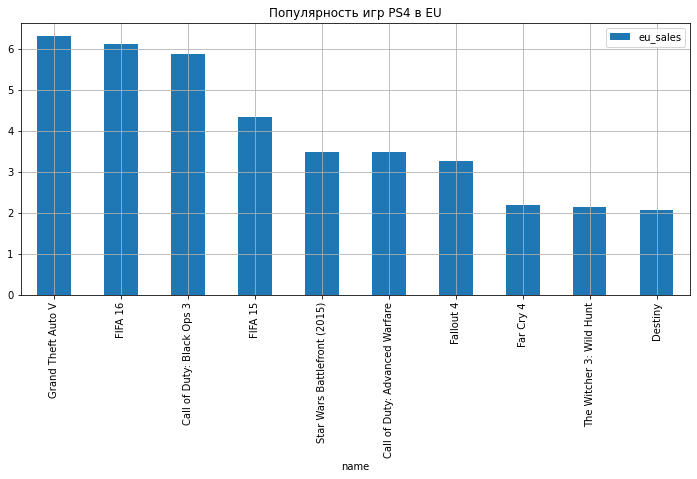

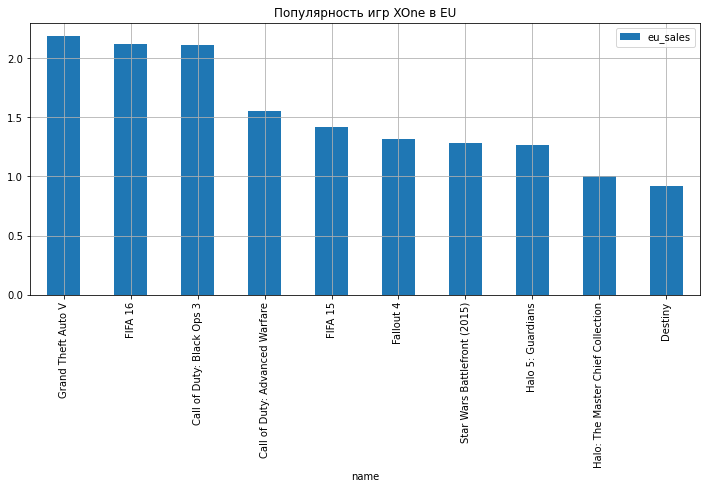

In [70]:
data_actual_ps4.pivot_table(index='name', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending = False).head(10).plot(kind='bar',
        grid=True, figsize=(12, 5), title='Популярность игр PS4 в EU')
data_actual_xone.pivot_table(index='name', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending = False).head(10).plot(kind='bar',
        grid=True, figsize=(12, 5), title='Популярность игр XOne в EU')

Сравнивая текущие объемы продаж игр для PS4 с растущей платформой XOne можно заметить, что первая тройка игр совпадает, а в оставшихся семи играх есть небольшие отличия как по рангу, так и по составу.

Теперь сравним распределение игр по трем платформам в США.

In [71]:
platform_usa = ['X360', 'XOne', 'PS4']
data_actual_platform_usa_sale = data_actual.query('platform == @platform_usa').pivot_table(
    index = 'name', columns='platform', values ='na_sales', aggfunc = 'sum')
data_actual_platform_usa_sale.reset_index().sort_values(by='X360', ascending=False).head(10)

platform,name,PS4,X360,XOne
154,Grand Theft Auto V,3.96,9.66,2.81
49,Call of Duty: Black Ops II,NaN,8.25,NaN
50,Call of Duty: Ghosts,1.78,6.73,1.88
158,Halo 4,NaN,6.65,NaN
229,Minecraft,1.48,5.70,1.61
17,Assassin's Creed III,NaN,3.13,NaN
47,Call of Duty: Advanced Warfare,2.81,2.77,3.22
240,NBA 2K13,NaN,2.60,NaN
213,Madden NFL 13,NaN,2.53,NaN
27,Battlefield 4,1.35,2.15,1.25


Кажется, на американском рынке десятка популярных игр на разных платформах отличается значительнее, чем на европейском. Посмотрим в деталях как распределились самые продаваемые игры на каждой платформе.

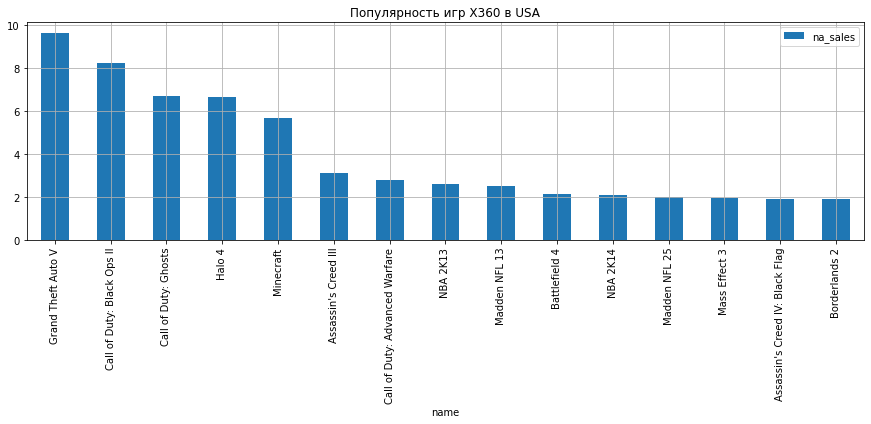

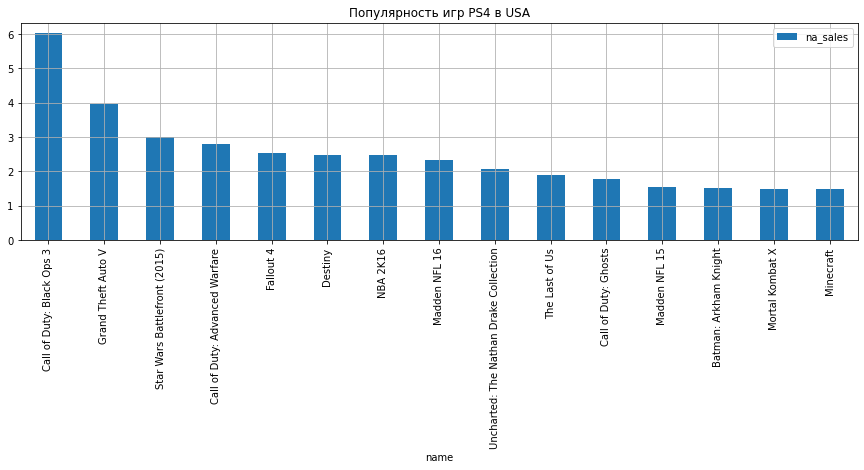

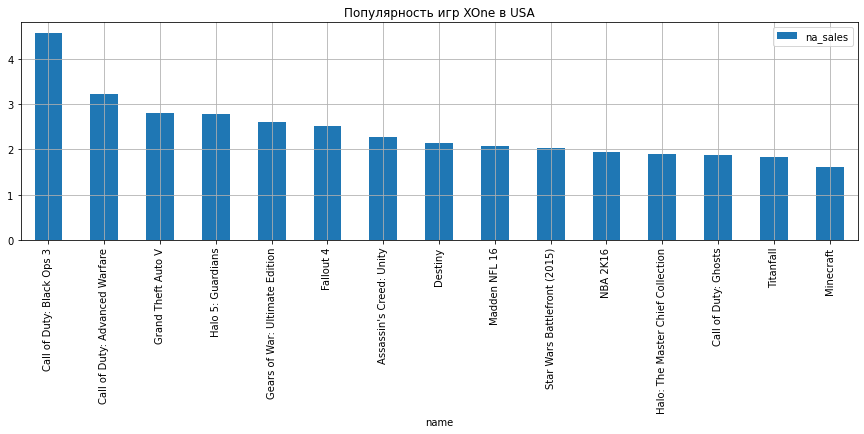

In [72]:
data_actual_x360 = data_actual.query('platform == "X360"')
data_actual_x360.pivot_table(index='name', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending = False).head(15).plot(kind='bar',
        grid=True, figsize=(15, 4), title='Популярность игр X360 в USA')
data_actual_ps4.pivot_table(index='name', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending = False).head(15).plot(kind='bar',
        grid=True, figsize=(15, 4), title='Популярность игр PS4 в USA')
data_actual_xone.pivot_table(index='name', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending = False).head(15).plot(kind='bar',
        grid=True, figsize=(15, 4), title='Популярность игр XOne в USA')

Из полученных диаграмм  и таблиц становится понятно, что с рынком США не все так просто, как с европейским. При сравнении лидирующей платформы X360 с перспективными PS4 и XOne выясняется, что только две игры входят в первую десятку игр на каждой платформе. Вот он шанс для продавцов и маркетологов проявить рыночное чутье и интуицию.

### Часть 5. Проверим некоторые статистические теории.

In [73]:
from scipy import stats as st
import numpy as np

    Посмотрим насколько близки рейтинги пользователей двух платформ: XOne и PC.

In [74]:
data_actual_xone['user_score_1'].unique()
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

    В датафрейме актуального периода отсутствует платформа PC, поэтому мы вновь обращаемся к исходным данным. Формируем 
    соответствующие датасеты.

In [75]:
data_xone = data.query('platform == "XOne"')
data_pc = data.query('platform == "PC"')

In [76]:
data_xone['user_score_1'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score_1, dtype: float64

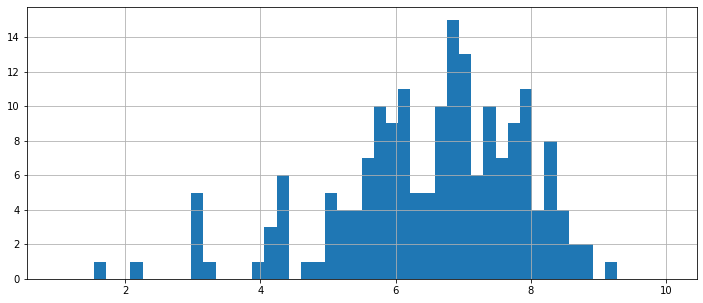

In [77]:
#Визуализируем рейтинг гистограммой
data_xone['user_score_1'].hist(bins=50, range=(1, 10), figsize=(12, 5))

In [91]:
#Cобираем выборку по правилу 3-х Сигм.
data_xone_user_sc = data_xone[(data_xone['user_score_1'] <= (data_xone['user_score_1'].mean() + (
    data_xone['user_score_1'].std()*3))) & (data_xone['user_score_1'] >= data_xone['user_score_1'].min())]

In [92]:
#Построим гистограмму и соберем выборку для платформы PC.
data_pc['user_score_1'].describe()

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score_1, dtype: float64

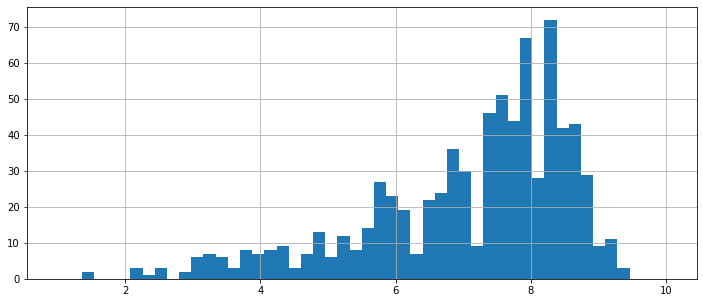

In [80]:
data_pc['user_score_1'].hist(bins=50, range=(1, 10), figsize=(12, 5))

In [81]:
data_pc_user_sc = data_pc[(data_pc['user_score_1'] <= (data_pc['user_score_1'].mean() + (
    data_pc['user_score_1'].std()*3))) & (data_pc['user_score_1'] >= data_pc['user_score_1'].min())]

#### Проверяем нулевую гипотезу о равенстве пользовательских рейтингов платформ Xbox One и PC. Соответственно, альтернативаня гипотеза говорит об обратном.

Перед проверкой гипотезы оценим дисперсии выборок, чтобы корректно определить атрибут equal_val в Т–тесте. Найдем и сравним дисперсии выборок.

In [82]:
variance_xone = np.var(data_xone_user_sc['user_score_1'], ddof=1)
variance_xone 

1.9069968429360702

In [83]:
variance_pc = np.var(data_pc_user_sc['user_score_1'], ddof=1)
variance_pc 

2.3407871413372

Поскольку дисперсии не равны, то в Т-тесте используем аргумент equal_var=False.

In [84]:
alpha = .05 

results = st.ttest_ind(
    data_xone_user_sc['user_score_1'], 
    data_pc_user_sc['user_score_1'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Принимаем альтернативную гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Принимаем альтернативную гипотезу


    Остается сделать вывод о том , что средние рейтинги двух платформ отличаются. Все как всегда: есть ярые сторонники 
    консолей, а есть независимая армия любителей игровых ПК.

#### Теперь проверим гипотезу о неравенстве пользовательских рейтингов жанров *Action* и *Sports*.

In [85]:
data_action = data.query('genre == "Action"')
data_sports = data.query('genre == "Sports"')

In [86]:
data_action_user_sc = data_action[(data_action['user_score_1'] <= (data_action['user_score_1'].mean() + (
    data_action['user_score_1'].std()*3))) & (data_action['user_score_1'] >= data_action['user_score_1'].min())]
#data_action_user_sc['user_score_1'].describe()

In [87]:
data_sports_user_sc = data_sports[(data_sports['user_score_1'] <= (data_sports['user_score_1'].mean() + (
    data_sports['user_score_1'].std()*3))) & (data_sports['user_score_1'] >= data_sports['user_score_1'].min())]
#data_sports_user_sc['user_score_1'].describe()

Аналогично предыдущему вопросу формулируем нулевую гипотезу о равенстве и, соответственно альтернативную гипотезу о не равенстве средних пользовательских рейтингов жанра *Acrion* и *Sports*.

Здесь для начала также сравниваем дисперсии двух выборок и применяем аргумент equal_var=False.

In [88]:
variance_action = np.var(data_action_user_sc['user_score_1'], ddof=1)
variance_action

2.031746898033191

In [89]:
variance_sports = np.var(data_sports_user_sc['user_score_1'], ddof=1)
variance_sports

2.5965147189730073

In [90]:
alpha = .05 

results = st.ttest_ind(
    data_action_user_sc['user_score_1'], 
    data_sports_user_sc['user_score_1'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Принимаем альтернативную гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Похоже, что рейтинги двух жанров довольно близки. И это, в общем объяснимо, поскольку игры обоих жанров требуют от пользователей схожих психо-физических данных. Просто предметный интерес разный, а суть каждой игры примерно одинакова.   

### Часть 6. Общий вывод и рекомендации.

Исходя из предоставленных данных, для планирования рекламной компании в качестве целевых рынков можно рекомендовать Америку и Европу, где предпочтения игроков сильно похожи как по платформам, так и по игровым жанрам. Особо стоит сфокусироваться на демонстрирующих рост платформах PS4 и Xbox One, но не стоит забывать и о приносящих хороший доход PS3 и X360. Выбор игровых жанров можно ограничить списком, в который стоит включить *Action*, *Shooter*, *Sports* и *Role-Playing*.

Несмотря на всеобщее проникновение английского языка, компании стоит завести на своем веб-сайте дополнительные языковые страницы. Все-таки не все и не везде знают английский, даже в Европе. На сайте NewZoo.com опубликован отчёт «Global Games Market Report», в котором представлена информация по валовому обороту игровых индустрий в разных странах на 2020 год: https://newzoo.com/insights/rankings/top-10-countries-by-game-revenues/

Для полноценного охвата европейского рынка стоит заложить бюджет на следующий год для для создания страниц на немецком, французском, испанском и итальянском языках, если их пока еще нет.

Что касается таких привлекательных в денежном плане рынков, как японский, корейский и китайский, то надо понимать, что это довольно закрытые рынки, развивающиеся по своим законам и каждый со своими особенностями. Для того, чтобы планово развивать бизнес в этом направлении, необходимо привлекать специалистов, которые хорошо разбираются как в игровых предпочтениях игроков в  этих странах, так и в особенностях национальных культур. 

Также можно рекомендовать компании заняться созданием более репрезентативной подборкой информации об игровой индустрии в фокусных регионах. Перечень игр в рассмотренных датасете сильно ограничен, в списке отсутствуют многие известные игры, упомянутые в таких обзорах, как "История развития компьютерных игр": https://gamesisart.ru/istoriya_komputernyh_igr_2.html и "История игровой индустрии в России: от «Тетриса» и русских квестов до мобильных игр": https://vc.ru/flood/5856-rugames-story. 
Например, не представлены данные по играм DotA 2, League of Legends, Heroes of Newerth, Panzar, Smite, Heroes of Newerth и другие из жанра MOBA (или DotA). Кстати, имеющиеся в списке игры из этого жанра, например Warcraft  отнесены к категории “strategy”, что не совсем корректно. 

__Рекомендуемая литература:__

Классификация жанров компьютерных игр: https://gamesisart.ru/janr.html  
Всемирная история игровой индустрии: https://stopgame.ru/blogs/topic/89367  
История игровой индустрии Японии: https://stopgame.ru/blogs/topic/89367  
История игровой индустрии Китая: https://stopgame.ru/blogs/topic/63397  
История игровой индустрии Америки: https://stopgame.ru/blogs/topic/77974  
История игровой индустрии Европы: https://stopgame.ru/blogs/topic/79043  
История игровой индустрии Южной Кореи:  https://stopgame.ru/blogs/topic/84608  
История игровой индустрии в России: от «Тетриса» и русских квестов до мобильных игр: https://vc.ru/flood/5856-rugames-story  
История развития компьютерных игр: https://gamesisart.ru/istoriya_komputernyh_igr_2.html  
2019-й год в цифрах: самые доходные платформы и самые популярные игры:  https://stopgame.ru/newsdata/41236